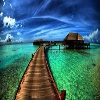

In [7]:
from PIL import Image
import numpy as np

img = Image.open("./images/1.png");
display(img)

In [54]:
img.size

(100, 100)

In [34]:
img_array = np.array(img)
l, w, h = img_array.shape

In [ ]:
def findK(percentClarity, arr):
    k = 0
    s = 0
    arrSum = sum(arr)
    for i in arr:
        s += i
        p = (s/arrSum)*100
        k+=1
        if round(p) >= percentClarity:
            return k

In [58]:
def compress_channel(img_array, channel, percentage):
    specific_channel = img_array[:,:,channel]
    U, S, Vt = np.linalg.svd(specific_channel)
    k = findk(percentage, S)
    reconstructed_channel = U[:,:k] @ np.diag(S[:k]) @ Vt[:k,:]
    return reconstructed_channel

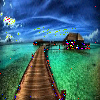

In [77]:
quality = 50


newimg_array = np.zeros((l,w,h))
for channel in range(h):
    newimg_array[:,:,channel] = compress_channel(img_array, channel, quality)
newimg = Image.fromarray(newimg_array.astype('uint8'))
display(newimg)

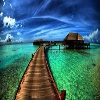

In [78]:
display(img)